# QUE HACER :


1. selección de variables óptima para el modelo.
2. Preprocesamiento adecuado y completo, adaptado a los objetivos de detección de patrones; transformación de variables y normalización aplicadas según la técnica de clustering seleccionada, detallando claramente los pasos.
3. Objetivos de detección de patrones (mínimo 3) bien definidos y alineados con el análisis ambiental; descripción clara y lógica de los objetivos y su relación con los datos y la calidad del aire.
4. Pipelines correctamente implementados, integrando todas las etapas del flujo de trabajo (desde preprocesamiento hasta validación); reutilizables y documentados claramente, con enfoque modular.
5. Ajuste de hiperparámetros aplicado mediante búsqueda aleatoria o exhaustiva, con resultados bien documentados; análisis detallado del impacto en el rendimiento utilizando validación cruzada.
6. Selección y aplicación de mínimo 5 modelos diferentes para objetivos; selección de técnicas adecuada (ej. K-Means, DBSCAN, PCA), bien fundamentada y documentada; entrenamiento óptimo con parámetros ajustados a los datos y objetivos.
7. Validación completa mediante índices internos (ej. Silhouette Score), externos (ej. Rand Index); análisis profundo de cada índice y comparación rigurosa entre modelos; documentación clara y detallada.
8. Conclusiones claras y detalladas sobre cada objetivo y patrones encontrados; análisis exhaustivo y propuestas de mejora o aplicaciones futuras; bien fundamentado con ejemplos y reflexiones relevantes sobre la calidad del aire.



# IMPORTS

In [9]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler


In [10]:
import pandas as pd

# lectura del csv
path = 'data/dataset.csv'
data = pd.read_csv(path) 
#exploracion de los datos 

data.info()
data.describe()
data.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10956 non-null  object 
 1   Ciudad        10956 non-null  object 
 2   NO (Ąg/m3)    10772 non-null  float64
 3   NO2 (Ąg/m3)   10723 non-null  float64
 4   NOX (Ąg/m3)   10731 non-null  float64
 5   PM10 (Ąg/m3)  8929 non-null   float64
 6   tavg          10950 non-null  float64
 7   tmin          10956 non-null  float64
 8   tmax          10956 non-null  float64
 9   prcp          10946 non-null  float64
 10  snow          283 non-null    float64
 11  wdir          8244 non-null   float64
 12  wspd          9522 non-null   float64
 13  wpgt          6301 non-null   float64
 14  pres          9139 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.3+ MB


,Date,Ciudad,NO (Ąg/m3),NO2 (Ąg/m3),NOX (Ąg/m3),PM10 (Ąg/m3),tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
0,2015-01-01,BILBAO,31.0,51.0,99.0,NaN,6.0,-1.3,16.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,BILBAO,63.0,65.0,162.0,NaN,6.6,-0.9,15.8,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,BILBAO,46.0,56.0,126.0,28.0,7.7,0.3,15.2,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,BILBAO,18.0,43.0,70.0,21.0,11.3,7.3,13.7,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,BILBAO,51.0,54.0,132.0,26.0,8.7,3.4,18.0,0.0,NaN,NaN,NaN,NaN,NaN
5,2015-01-06,BILBAO,22.0,42.0,74.0,23.0,9.7,6.0,11.8,0.0,NaN,NaN,NaN,NaN,NaN
6,2015-01-07,BILBAO,37.0,50.0,106.0,24.0,9.0,3.1,16.9,0.0,NaN,NaN,NaN,NaN,NaN
7,2015-01-08,BILBAO,67.0,64.0,167.0,31.0,9.7,2.5,15.0,0.0,NaN,NaN,NaN,NaN,NaN
8,2015-01-09,BILBAO,65.0,60.0,159.0,33.0,10.8,4.4,20.1,0.0,NaN,NaN,NaN,NaN,NaN
9,2015-01-10,BILBAO,28.0,41.0,84.0,29.0,10.1,4.5,12.9,1.2,NaN,NaN,NaN,NaN,NaN


In [11]:
# Verificar valores faltantes con salida completa
missing_summary = data.isnull().sum()
print(missing_summary.to_string())



Date                0
Ciudad              0
NO (Ąg/m3)        184
NO2 (Ąg/m3)       233
NOX (Ąg/m3)       225
PM10 (Ąg/m3)     2027
tavg                6
tmin                0
tmax                0
prcp               10
snow            10673
wdir             2712
wspd             1434
wpgt             4655
pres             1817


# TRATAMIENTO DE DATASET 

1. Añadir valores en campos nulos 

In [12]:
import pandas as pd

# Cargar el dataset (suponiendo que lo tienes en un archivo CSV)
df = pd.read_csv('data/dataset.csv')

# Asegúrate de que las fechas están en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Función para imputar los valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):  # Iterar sobre los 12 meses
            # Filtrar por ciudad, año y mes directamente desde la columna 'Date'
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            
            # Si hay datos en ese mes para ese año, usar la media de ese año
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                # Si no hay datos para ese mes en ese año, calcular la media de otros años
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            
            # Si se pudo calcular una media, redondearla a un decimal y usarla para imputar
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
            
    return df

# Columnas a imputar
numerical_cols = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Imputar para cada ciudad y columna
for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)


# Eliminar solo la columna 'snow' tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])

# Verificar si aún hay valores faltantes
print(df.isnull().sum())


Date            0
Ciudad          0
NO (Ąg/m3)      0
NO2 (Ąg/m3)     0
NOX (Ąg/m3)     0
PM10 (Ąg/m3)    0
tavg            0
tmin            0
tmax            0
prcp            0
wdir            0
wspd            0
wpgt            0
pres            0
dtype: int64


# DETECCIÓN DE OUTLIERS
## 1. Método del Rango Intercuartílico (IQR)
Usaremos el método del IQR para detectar outliers en las columnas numéricas especificadas. El rango intercuartílico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los outliers se definen como valores que están por debajo de Q1−1.5×IQR o por encima de Q3+1.5×IQR.

In [13]:
import pandas as pd

# Función para detectar outliers con IQR
def detectar_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Detectar outliers
        outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        outliers[col] = outliers_col
    return outliers

# Aplicar la función a las columnas numéricas
outliers_iqr = detectar_outliers_iqr(df, numerical_cols)

# Mostrar los outliers encontrados
for col, data in outliers_iqr.items():
    if not data.empty:
        print(f"Outliers en la columna {col}:")
        print(data[[col]])
        print("\n")
    else:
        print(f"No se encontraron outliers en la columna {col}\n")

Outliers en la columna NO (Ąg/m3):
       NO (Ąg/m3)
0            31.0
1            63.0
2            46.0
4            51.0
6            37.0
...           ...
10614        26.0
10617        29.0
10909        37.0
10936        28.0
10951        28.0

[1274 rows x 1 columns]


Outliers en la columna NO2 (Ąg/m3):
       NO2 (Ąg/m3)
1             65.0
2             56.0
4             54.0
7             64.0
8             60.0
...            ...
10201         74.0
10202         63.0
10207         85.0
10208         57.0
10216         66.0

[275 rows x 1 columns]


Outliers en la columna NOX (Ąg/m3):
       NOX (Ąg/m3)
0             99.0
1            162.0
2            126.0
4            132.0
5             74.0
...            ...
10617         74.0
10909         86.0
10923         71.0
10936         80.0
10951         71.0

[629 rows x 1 columns]


Outliers en la columna PM10 (Ąg/m3):
       PM10 (Ąg/m3)
64             40.0
68             39.0
69             45.0
70             51.0
78   

### 2. Método Z-score

El Z-score mide cuántas desviaciones estándar se encuentra un valor respecto a la media. Los outliers son aquellos valores cuyo Z-score es mayor que 3 o menor que -3.

In [14]:
from scipy.stats import zscore
# Función para detectar outliers con Z-score
def detectar_outliers_zscore(df, columnas):
    outliers = {}
    for col in columnas:
        z_scores = zscore(df[col])
        
        # Detectar outliers donde el Z-score es mayor a 3 o menor a -3
        outliers_col = df[(z_scores > 3) | (z_scores < -3)]
        outliers[col] = outliers_col
    return outliers

# Aplicar la función a las columnas numéricas
outliers_zscore = detectar_outliers_zscore(df, numerical_cols)

# Mostrar los outliers encontrados
for col, data in outliers_zscore.items():
    if not data.empty:
        print(f"Outliers en la columna {col} según Z-score:")
        print(data[[col]])
        print("\n")
    else:
        print(f"No se encontraron outliers en la columna {col} según Z-score\n")

Outliers en la columna NO (Ąg/m3) según Z-score:
      NO (Ąg/m3)
1           63.0
7           67.0
8           65.0
334         71.0
335         97.0
...          ...
7638        70.0
7639        74.0
8019        72.0
8031        98.0
8731        62.0

[275 rows x 1 columns]


Outliers en la columna NO2 (Ąg/m3) según Z-score:
       NO2 (Ąg/m3)
1             65.0
7             64.0
335           67.0
1471          63.0
1516          65.0
...            ...
10199         79.0
10201         74.0
10202         63.0
10207         85.0
10216         66.0

[162 rows x 1 columns]


Outliers en la columna NOX (Ąg/m3) según Z-score:
      NOX (Ąg/m3)
1           162.0
2           126.0
4           132.0
6           106.0
7           167.0
...           ...
8744        132.0
8808        109.0
8821        141.0
9137        109.0
9461        138.0

[206 rows x 1 columns]


Outliers en la columna PM10 (Ąg/m3) según Z-score:
       PM10 (Ąg/m3)
70             51.0
241            55.0
672           

# Normalizar 

In [15]:
# Normalizar
scaler = MinMaxScaler()

# Normalizar los datos numéricos
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Mostrar el resultado
print(df_normalized)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

¡Perfecto! Si deseas usar solo las variables **más correlacionadas** como variables independientes (**X**), debemos identificar cuáles tienen una fuerte relación con los **4 gases** (NO, NO₂, NOX, PM10). 

### 🔎 **Selección de Variables Independientes (X) Más Correlacionadas**

Basándonos en los análisis visuales previos y lo que generalmente influye en la contaminación, las variables más correlacionadas suelen ser:

1. **Temperatura:**  
   - **tavg** (Temperatura promedio) → **Correlación negativa** con NO, NO₂ y NOX.  
   - **tmin** y **tmax** podrían incluirse si muestran correlación significativa.

2. **Velocidad del viento:**  
   - **wspd** (Velocidad del viento) → **Correlación negativa** con los gases (dispersa contaminantes).  
   - **wpgt** (Ráfagas de viento) → Similar efecto.

3. **Precipitación:**  
   - **prcp** (Precipitación) → **Correlación negativa** con partículas PM10 (la lluvia limpia el aire).

4. **Presión atmosférica:**  
   - **pres** → **Correlación positiva** con NO y NO₂ (presiones altas pueden estancar el aire).

---

### ✅ **Variables Independientes (X) Recomendadas**

**X = ['tavg', 'wspd', 'prcp', 'pres']**

Estas son las más relevantes por su correlación y efecto físico sobre los contaminantes.  
Si quieres ser más preciso, puedo generar el cálculo exacto de correlaciones. ¿Quieres que lo haga? 📊

# ONE - HOT ENCODING
Transformar variables categóricas (como Ciudad) con One-Hot Encoding.

In [38]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Lista de ciudades
ciudades = ['BILBAO', 'GASTEIZ', 'SAN-SEBASTIAN']

# Crear un DataFrame
df = pd.DataFrame({'Ciudad': ciudades})

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar la columna 'ciudad'
encoded_data = encoder.fit_transform(df[['Ciudad']])

# Crear un DataFrame con las columnas correspondientes
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Ciudad']))

# Mostrar el resultado
print(df_encoded)


   Ciudad_BILBAO  Ciudad_GASTEIZ  Ciudad_SAN-SEBASTIAN
0            1.0             0.0                   0.0
1            0.0             1.0                   0.0
2            0.0             0.0                   1.0


# Selección de variables óptima para el modelo.

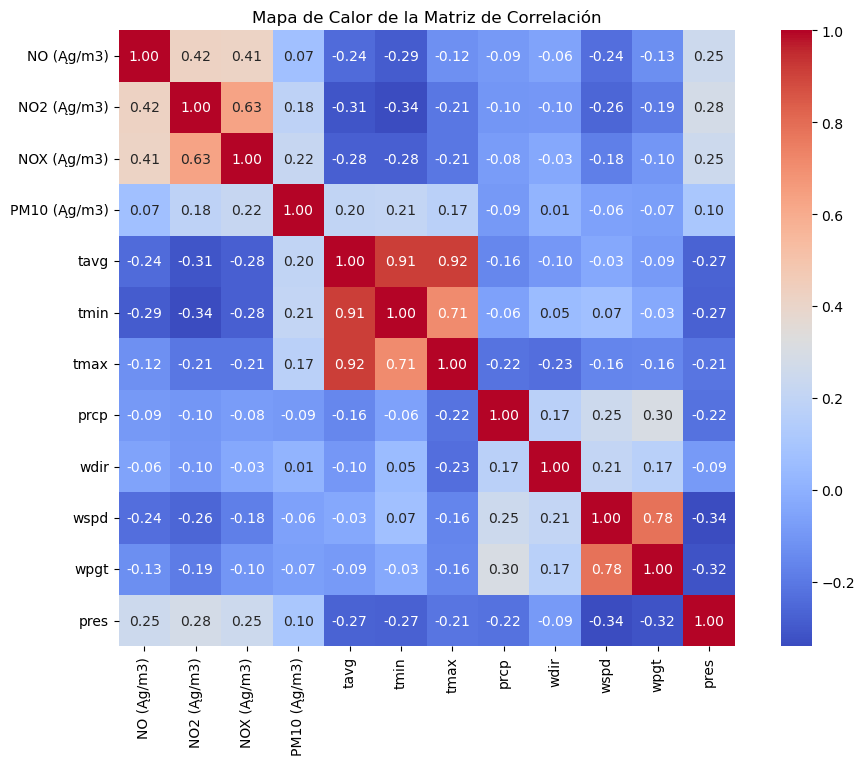

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

#Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

#Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

ESTE MAPA DE CORRELACION ESTA MAL. HAY QUE MIRAR EJ: SI CUANDO HACE MENOS DE 5 GRADOS HAY MAS CONTAMINTATE O NO. 

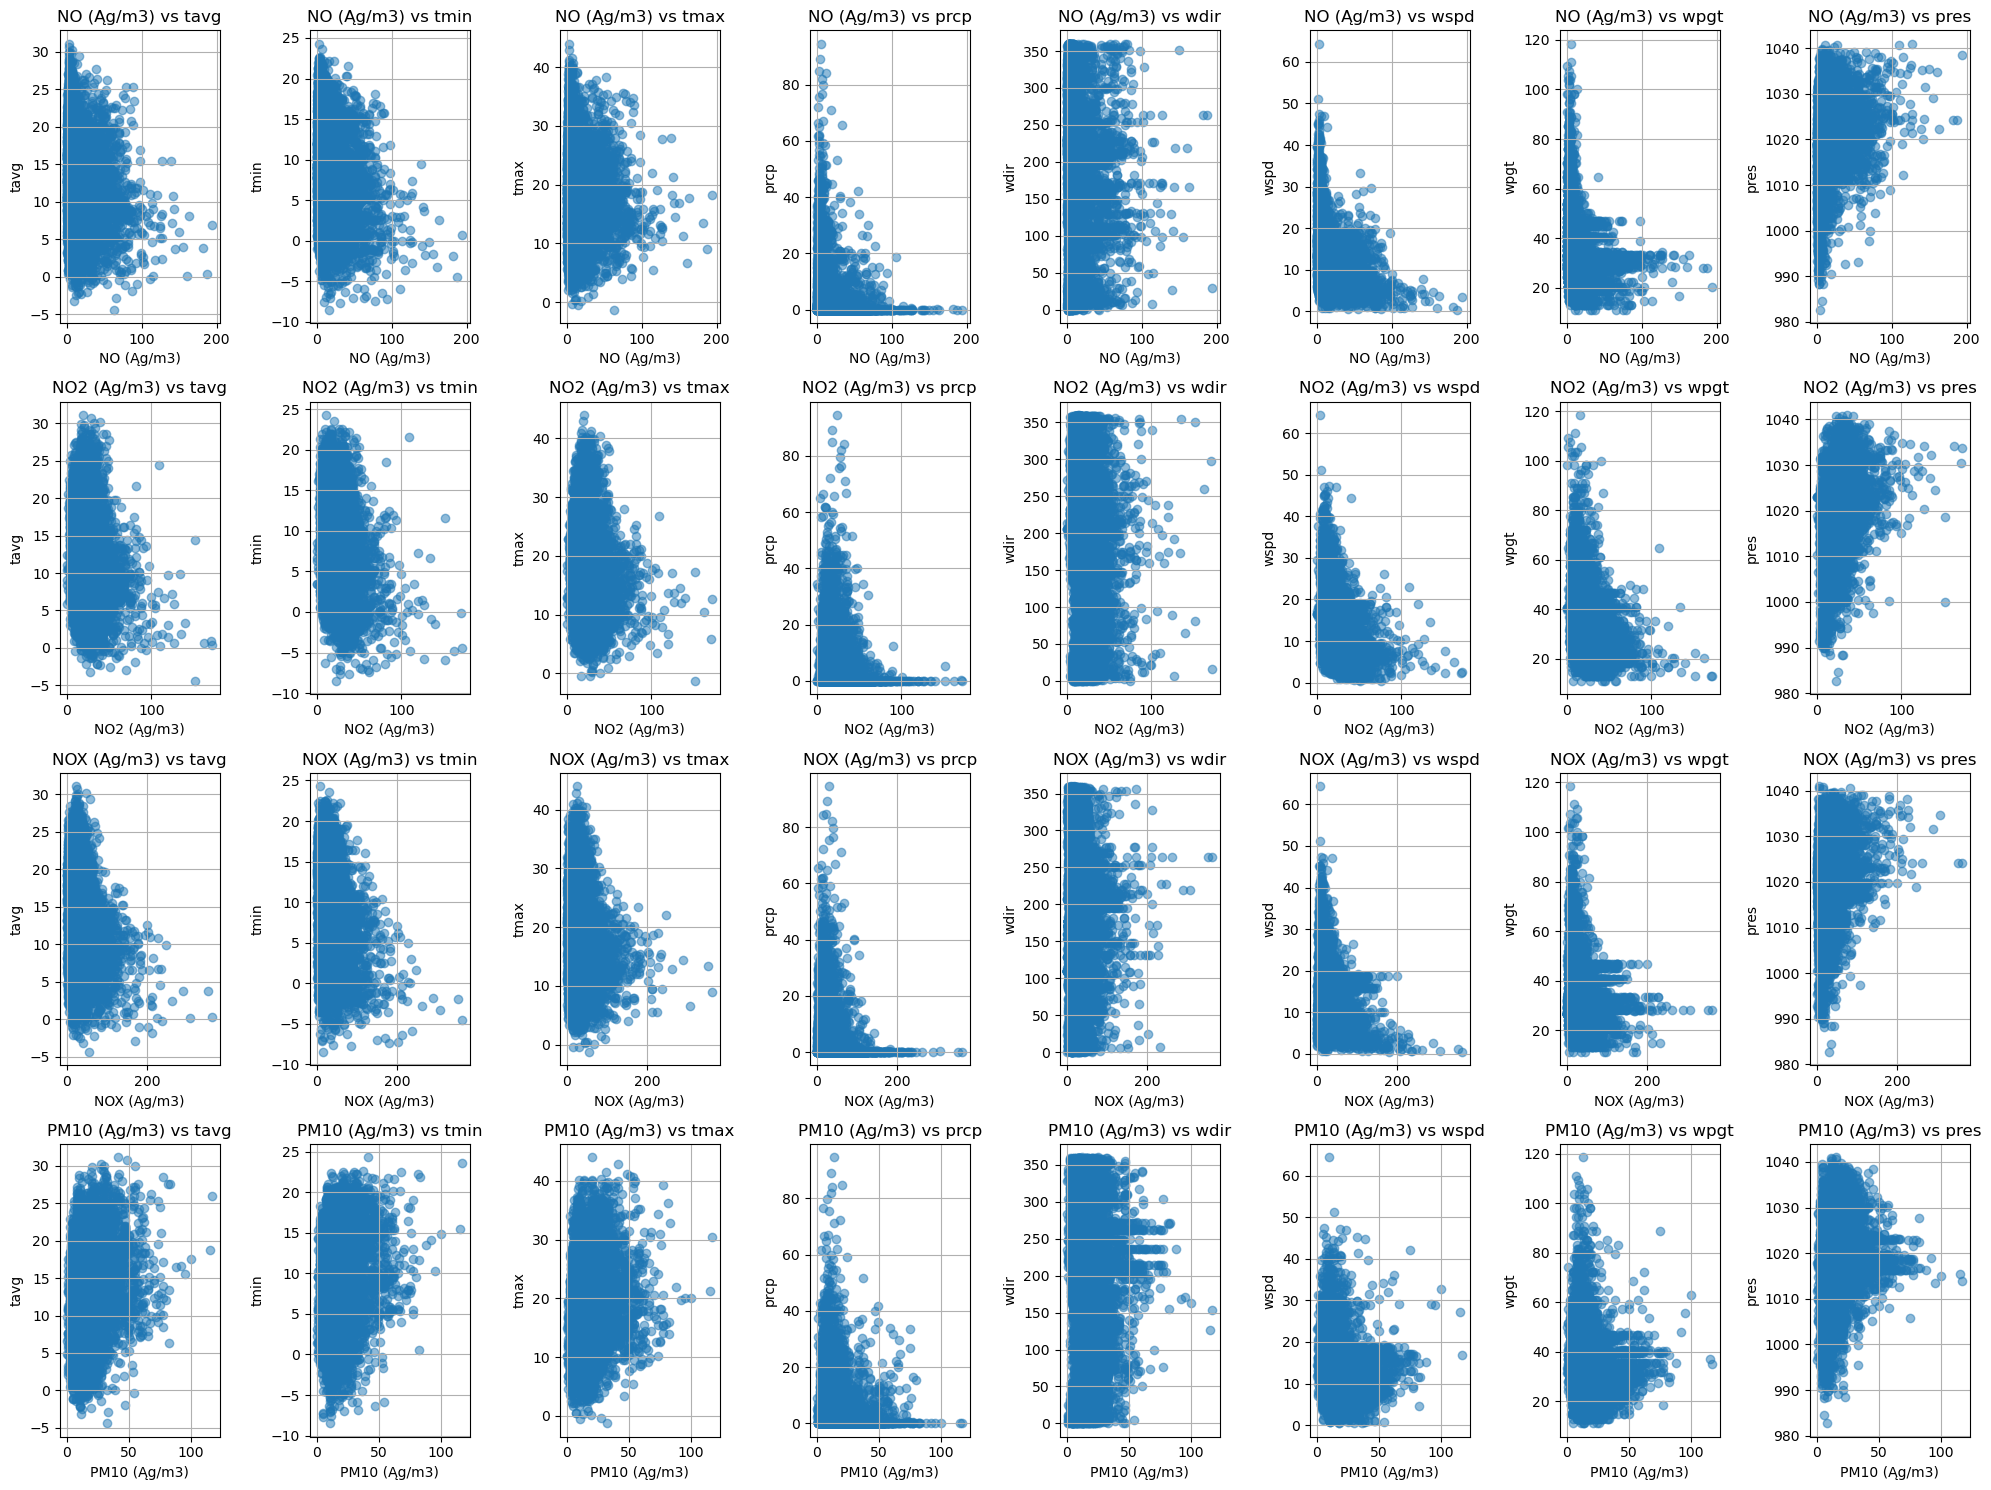

In [15]:

# Lista de gases y variables a analizar
gases = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)']
variables = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Crear subgráficos en una sola figura (4 filas y 8 columnas)
fig, axes = plt.subplots(4, 8, figsize=(20, 15))

# Aplanar la lista de ejes para facilitar el acceso
axes = axes.flatten()

# Crear gráficos de dispersión para cada gas
index = 0
for gas in gases:
    for i, var in enumerate(variables):
        axes[index].scatter(df[gas], df[var], alpha=0.5)
        axes[index].set_title(f'{gas} vs {var}')
        axes[index].set_xlabel(gas)
        axes[index].set_ylabel(var)
        axes[index].grid(True)
        index += 1

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()


Observando la matriz de gráficos de dispersión, puedo identificar algunas correlaciones notables entre los gases contaminantes y las variables meteorológicas:

Correlaciones negativas (a mayor valor de la variable, menor concentración de gases):
Temperatura promedio (tavg), mínima (tmin) y máxima (tmax):

Los gases NO, NO2 y NOX presentan una clara correlación negativa con estas variables. A mayor temperatura, las concentraciones de estos gases tienden a disminuir.
La relación es más pronunciada con NO y NOX.
Velocidad del viento (wspd) y ráfagas de viento (wpgt):

Los contaminantes gaseosos (NO, NO2, NOX) muestran una tendencia a disminuir cuando aumenta la velocidad del viento. Esto sugiere que el viento ayuda a dispersar los contaminantes.
Correlaciones positivas (a mayor valor de la variable, mayor concentración de gases):
Presión atmosférica (pres):
Existe una ligera correlación positiva entre NO, NO2 y NOX con la presión atmosférica. A mayor presión, se observan mayores concentraciones de estos gases.
PM10 también muestra una tendencia creciente con la presión, aunque menos marcada.
Relaciones débiles o dispersas:
Precipitación (prcp):

No se observa una correlación clara entre las concentraciones de gases y la precipitación. Sin embargo, se nota que en presencia de precipitación, las concentraciones de gases tienden a ser bajas, aunque de forma dispersa.
Esto puede deberse a la capacidad de la lluvia para limpiar el aire de partículas y gases.
Dirección del viento (wdir):

La relación entre la dirección del viento y los contaminantes no muestra un patrón claro, como es común en variables circulares.
Material particulado PM10:

La relación entre PM10 y las variables meteorológicas es más dispersa. Se observa una leve disminución con el aumento de la temperatura, pero menos pronunciada que en los otros gases.
Resumen de correlaciones destacadas:
Negativa: Temperatura (tavg, tmin, tmax) y velocidad del viento (wspd, wpgt) con NO, NO2, NOX.
Positiva: Presión atmosférica (pres) con NO, NO2, NOX y, en menor medida, PM10.
Débil: Precipitación (prcp) y dirección del viento (wdir) no muestran correlaciones fuertes.
¿Quieres que realice un análisis más detallado o que proponga algún análisis estadístico para

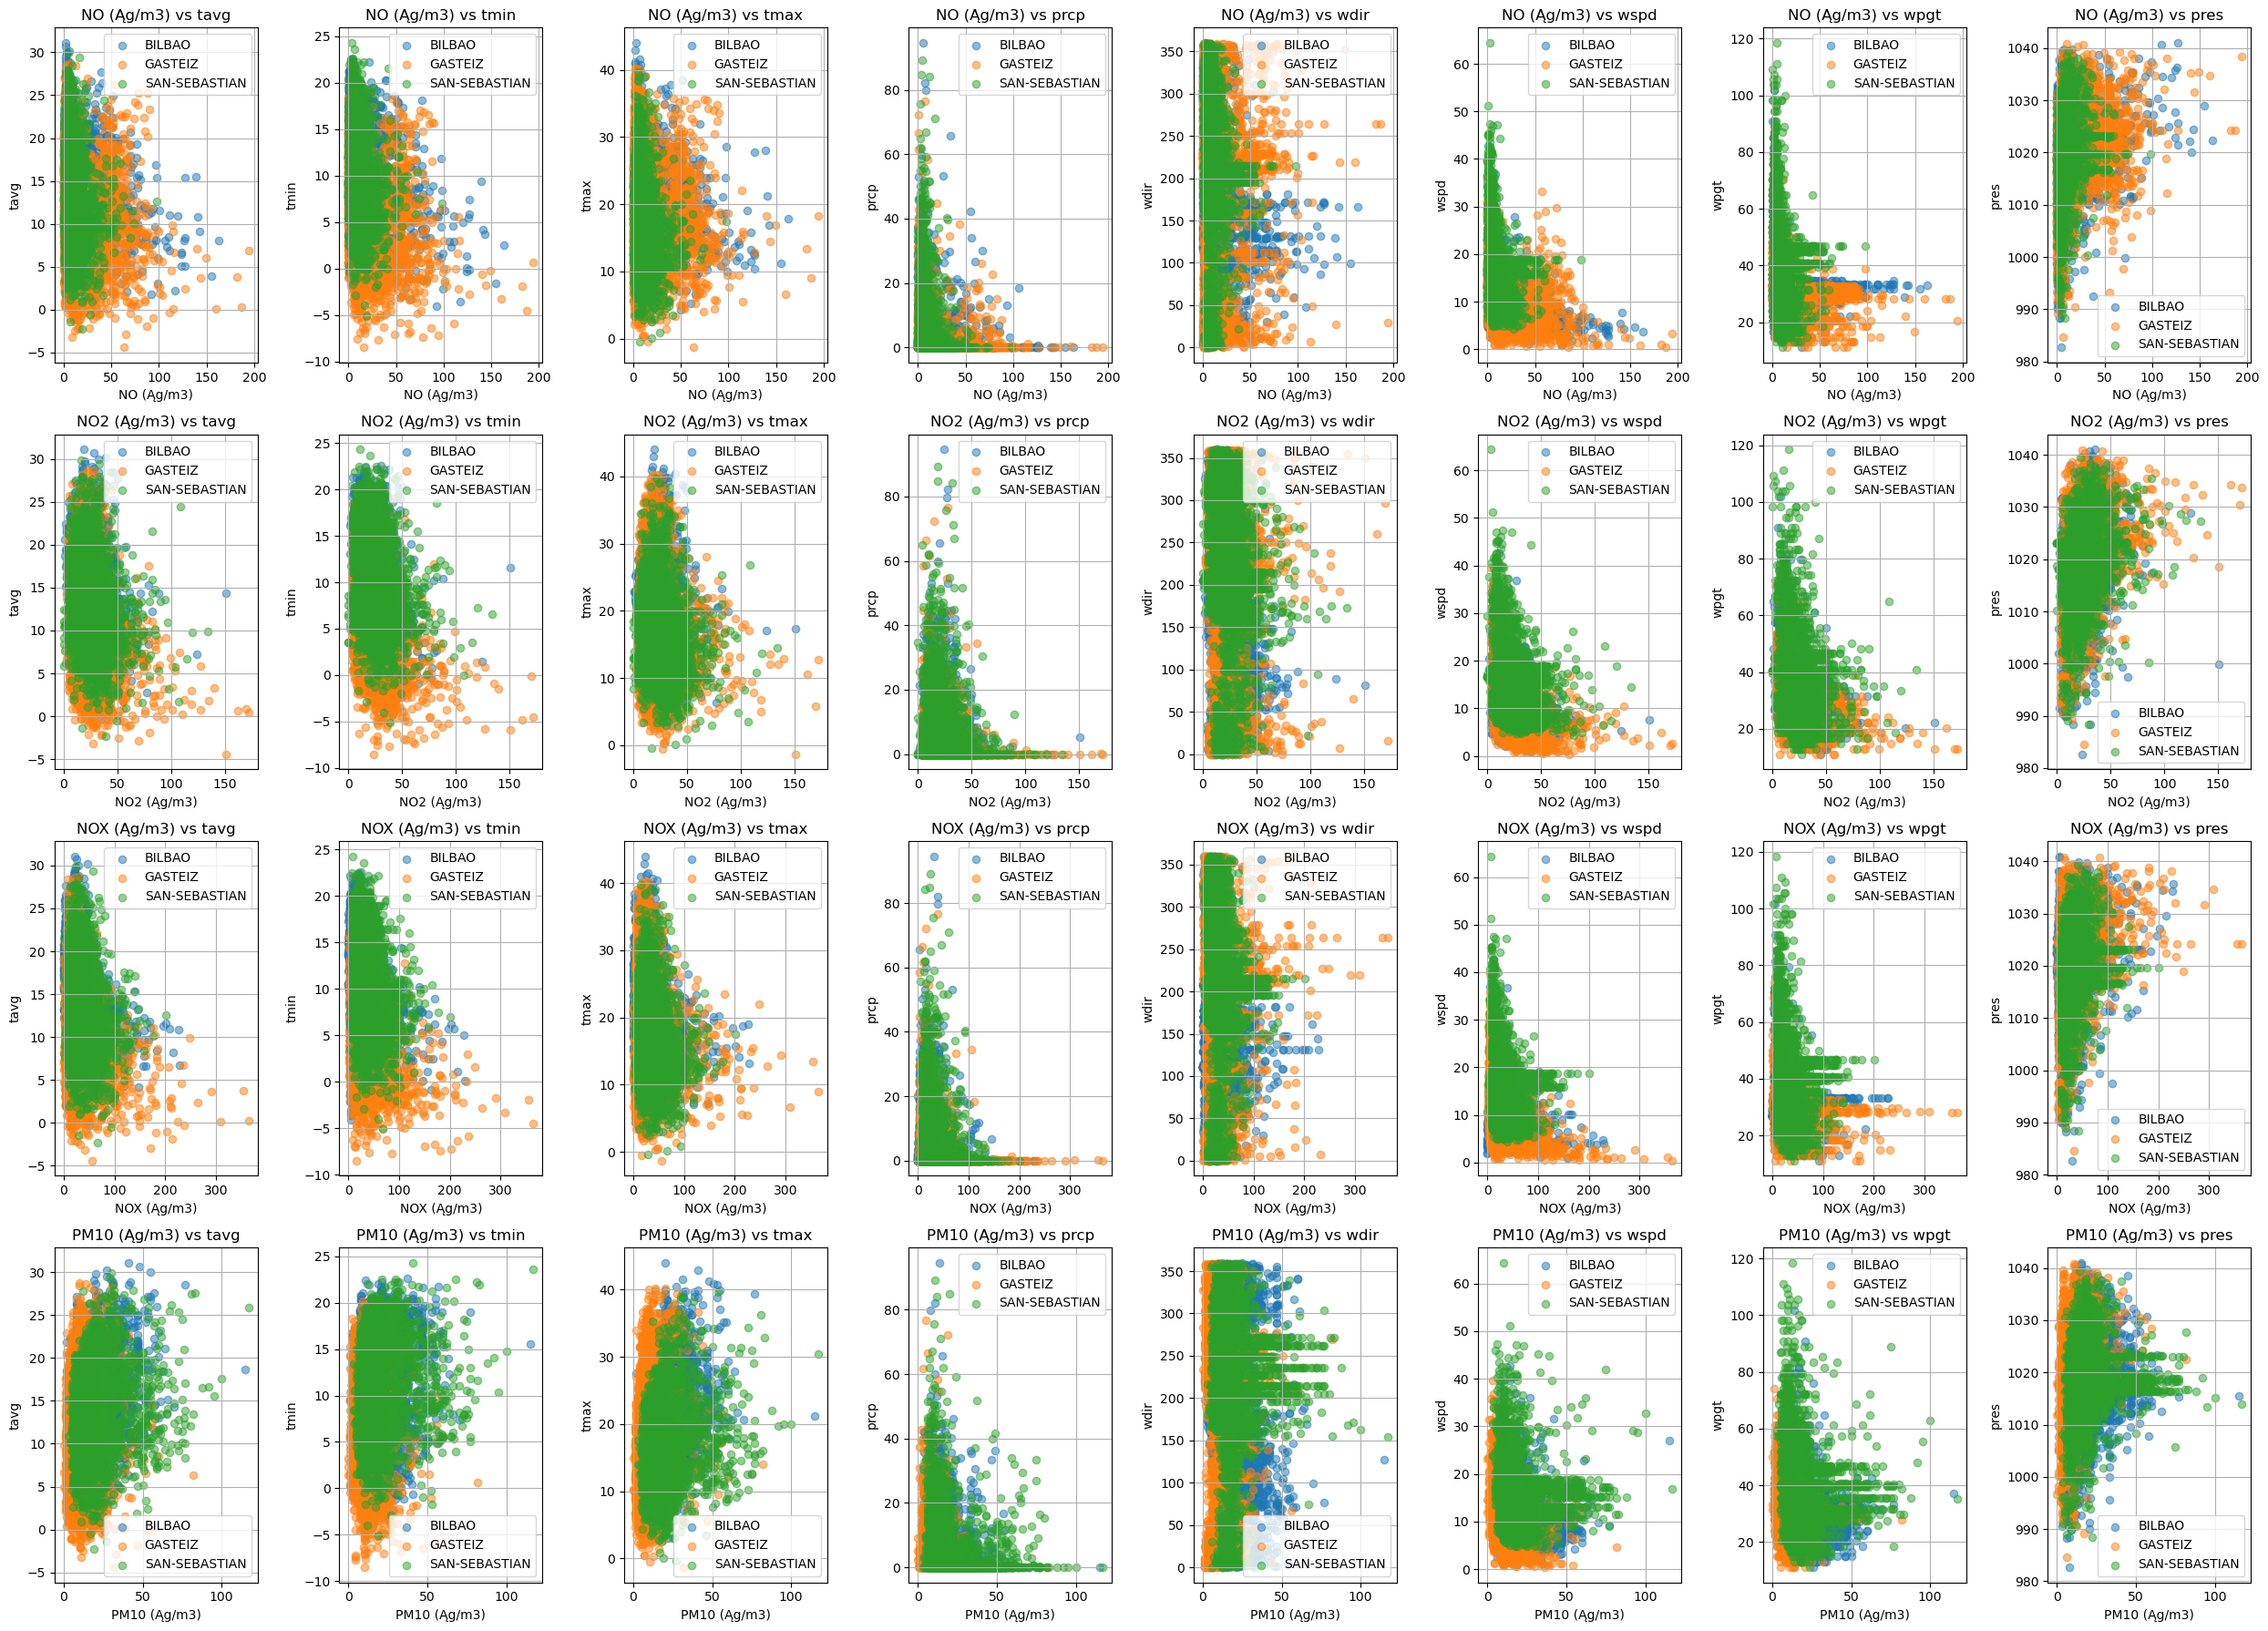

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de ciudades
ciudades = ['BILBAO', 'GASTEIZ', 'SAN-SEBASTIAN']

# Crear subgráficos (4 filas y 8 columnas por ciudad)
fig, axes = plt.subplots(4, 8, figsize=(25, 18))

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Crear gráficos de dispersión separados por ciudad
index = 0
for gas in gases:
    for var in variables:
        for ciudad in ciudades:
            # Filtrar datos por ciudad
            df_ciudad = df[df['Ciudad'] == ciudad]
            
            # Graficar cada ciudad con diferente color
            axes[index].scatter(df_ciudad[gas], df_ciudad[var], alpha=0.5, label=ciudad)
        
        # Títulos y etiquetas
        axes[index].set_title(f'{gas} vs {var}')
        axes[index].set_xlabel(gas)
        axes[index].set_ylabel(var)
        axes[index].grid(True)
        axes[index].legend()  # Leyenda para identificar las ciudades
        index += 1

# Ajustar el diseño
plt.tight_layout()
plt.show()


En los gráficos de dispersión que muestras, se comparan los contaminantes atmosféricos (**NO**, **NO₂**, **NOx**, **PM10**) con variables meteorológicas (**tavg**, **tmin**, **tmax**, **prcp**, **wdir**, **wspd**, **wpgt**, **pres**) para tres ciudades: **Bilbao**, **Gazteis** y **San Sebastián**. Cada ciudad está representada con un color diferente:

- **Bilbao** → Azul  
- **Gazteis** → Naranja  
- **San Sebastián** → Verde  

### 🔎 **Análisis de Correlaciones Visuales**

1. **Relación Inversa con Temperatura (tavg, tmin, tmax):**  
   - Se observa una **correlación negativa** entre los gases **NO**, **NO₂**, y **NOx** con las temperaturas (**tavg**, **tmin**, **tmax**) en todas las ciudades.  
   - A menor temperatura, las concentraciones de estos gases tienden a ser mayores.  

2. **Relación con Precipitación (prcp):**  
   - La **precipitación** parece tener un efecto de dispersión de contaminantes.  
   - A mayor **prcp**, las concentraciones de **NO**, **NO₂**, y **NOx** disminuyen, aunque en **San Sebastián** (verde) se nota más dispersión.  

3. **Relación con la Velocidad del Viento (wspd, wpgt):**  
   - Existe una **relación negativa**: a mayor **velocidad del viento**, menores concentraciones de contaminantes.  
   - **San Sebastián** presenta valores más dispersos, posiblemente por su proximidad al mar.  

4. **Dirección del Viento (wdir):**  
   - No parece haber una relación clara entre la **dirección del viento** y los contaminantes. La distribución es dispersa.  

5. **Presión Atmosférica (pres):**  
   - A mayor **presión atmosférica**, tienden a concentrarse más los contaminantes (**NO**, **NO₂**, **NOx**).  
   - Esto es más evidente en **Gazteis** y **Bilbao**.  

6. **Comportamiento del PM10:**  
   - **PM10** no muestra una tendencia clara con la temperatura, pero parece tener más valores altos en **San Sebastián** (verde).  
   - Hay mayor dispersión de **PM10** en comparación con los gases.

---

### 🌆 **Comparación entre Ciudades**

- **Bilbao (Azul):**  
  - Presenta **altas concentraciones** de **NO**, **NO₂** y **NOx** a bajas temperaturas.  
  - La influencia del viento reduce los niveles de contaminantes.

- **Gazteis (Naranja):**  
  - Muestra **niveles moderados** de contaminantes, con patrones similares a Bilbao, pero con menor dispersión.  
  - La presión atmosférica parece tener un impacto más notable.

- **San Sebastián (Verde):**  
  - Muestra **mayor dispersión** en los valores, especialmente en **PM10**.  
  - La cercanía al mar y mayores vientos podrían explicar la variabilidad.

---

### 📊 **Siguientes Pasos Sugeridos**

1. **Mapa de Calor de Correlación:** Para cuantificar estas relaciones.  
2. **Boxplots por Ciudad:** Para comparar medianas y distribuciones de contaminantes.  
3. **Análisis Temporal:** Ver si estas relaciones cambian según la estación del año.  



# entrenar

In [25]:
from sklearn.preprocessing import StandardScaler
# 3️⃣ Selección de Variables Basada en Correlación
variables_interes = ['tavg', 'wspd', 'prcp', 'pres']
X = df[variables_interes]
y = df[['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)']]

# 4️⃣ Preprocesamiento: Normalización de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.41440036 -0.25954611 -0.43186277  0.60447623]
 [-1.30674034 -0.25954611 -0.43186277  0.60447623]
 [-1.10936364 -0.25954611 -0.43186277  0.60447623]
 ...
 [-1.03759029 -0.66655781 -0.43186277  1.63385348]
 [-1.36057035 -0.75135191 -0.43186277  1.56236895]
 [-1.55794705 -0.88702248 -0.43186277  1.6910411 ]]


In [31]:
import pandas as pd

# Cargar el dataset (suponiendo que lo tienes en un archivo CSV)
df = pd.read_csv('data/dataset.csv')

# Asegúrate de que las fechas están en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Función para imputar los valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):  # Iterar sobre los 12 meses
            # Filtrar por ciudad, año y mes directamente desde la columna 'Date'
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            
            # Si hay datos en ese mes para ese año, usar la media de ese año
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                # Si no hay datos para ese mes en ese año, calcular la media de otros años
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            
            # Si se pudo calcular una media, redondearla a un decimal y usarla para imputar
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
            
    return df

# Columnas a imputar
numerical_cols = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Imputar para cada ciudad y columna
for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)


# Eliminar solo la columna 'snow' tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])

# Verificar si aún hay valores faltantes
print(df.isnull().sum())

Date            0
Ciudad          0
NO (Ąg/m3)      0
NO2 (Ąg/m3)     0
NOX (Ąg/m3)     0
PM10 (Ąg/m3)    0
tavg            0
tmin            0
tmax            0
prcp            0
wdir            0
wspd            0
wpgt            0
pres            0
dtype: int64


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score


# Separar características y objetivos
target_vars = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)']


# Normalización y One-Hot Encoding
numerical_features = ['tavg', 'wspd', 'prcp', 'pres']
categorical_features = ['Ciudad']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Aplicar el preprocesador
X = df[numerical_features + categorical_features]
Y = df[target_vars]

X_preprocessed = preprocessor.fit_transform(X)


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clustering', KMeans(n_clusters=3, random_state=42))
])

# Ajustar el pipeline
pipeline.fit(X)

# Etiquetas de cluster
clusters = pipeline.named_steps['clustering'].labels_
df['Cluster'] = clusters
print(df[['Ciudad', 'Cluster']].head())


   Ciudad  Cluster
0  BILBAO        2
1  BILBAO        2
2  BILBAO        2
3  BILBAO        2
4  BILBAO        2


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('data/dataset.csv')

# Asegúrate de que las fechas están en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Imputar valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
    return df

# Columnas a imputar
numerical_cols = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)', 
                  'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)

# Eliminar columna 'snow' si tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])



# Variables objetivo y características
target_vars = ['NO (Ąg/m3)', 'NO2 (Ąg/m3)', 'NOX (Ąg/m3)', 'PM10 (Ąg/m3)']
feature_vars = ['tavg', 'wspd', 'prcp', 'pres']

X = df[feature_vars + ['Ciudad']]
Y = df[target_vars]

# Preprocesamiento: Normalización y One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), feature_vars),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Ciudad'])
    ]
)

# Pipelines para clustering
clustering_models = {
    'KMeans': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'GaussianMixture': GaussianMixture(n_components=4, random_state=42)
}

for model_name, model in clustering_models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clustering', model)
    ])
    pipeline.fit(X)
    clusters = pipeline.named_steps['clustering'].labels_ if hasattr(model, 'labels_') else pipeline.named_steps['clustering'].predict(X)
    df[f'Cluster_{model_name}'] = clusters
    if len(set(clusters)) > 1:
        sil_score = silhouette_score(preprocessor.transform(X), clusters)
        db_index = davies_bouldin_score(preprocessor.transform(X), clusters)
        print(f"{model_name} - Silhouette Score: {sil_score:.2f}, Davies-Bouldin Index: {db_index:.2f}")

# PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessor.transform(X))
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Clustering Visualizado con PCA')
plt.show()

# Guardar el resultado final
df.to_csv('processed_data_with_clusters.csv', index=False)
print("Clustering completado y datos guardados.")


KMeans - Silhouette Score: 0.66, Davies-Bouldin Index: 0.67
DBSCAN - Silhouette Score: 0.80, Davies-Bouldin Index: 0.29
Agglomerative - Silhouette Score: 0.65, Davies-Bouldin Index: 0.72


ValueError: could not convert string to float: 'BILBAO'